In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
                               



In [23]:
pip install spacy -q

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install wordcloud -q

In [29]:
!pip install langdetect -q

In [7]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
Df = pd.read_csv("C:/Users/user/Desktop/CapstoneProject/NLP/chatgpt_style_reviews_dataset.xlsx - Sheet1 (1).csv")

In [76]:
Df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [77]:
Df.shape

(250, 12)

In [78]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [79]:
Df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [80]:
Df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [81]:
## remove whitespace

def remove_whitespace(text):
    return " ".join(text.split())

Df['review']=Df['review'].apply(remove_whitespace)

In [82]:
import spacy                              
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException  
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")  

In [9]:

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

Df['detect_language'] = Df['review'].apply(detect_language)

# Filter only English reviews
df = df[df['detect_language'] == 'en']
print(df['detect_language'].value_counts())

detect_language
en    250
Name: count, dtype: int64


In [83]:


def clean_text(text):
    
    # Remove non-alphabetic characters (keep spaces)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()
    return text

Df['review'] = Df['review'].apply(clean_text)

In [84]:
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

Df['review'] = Df['review'].apply(spacy_preprocess)
Df['review']

0      sense include lot effect fill general relation...
1      ask develop bag worker pass expert white arm s...
2      customer address region try near risk girl spr...
3      television loss election small detail red son ...
4      pass share lot manage world worker exactly dev...
                             ...                        
245    government card history suddenly save theory p...
246    court control million offer total hit end hair...
247    opportunity ask large practice time live relat...
248    simple audience include claim create woman sim...
249    goal positive bank later election article arri...
Name: review, Length: 250, dtype: object

In [85]:
Df['review'] = Df['review'].str.replace(r'\s*\n\s*', ' ', regex=True)

In [86]:
Df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\user\AppData\Local\Temp\ipykernel_16432\128022211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Df, x='rating', palette='coolwarm')


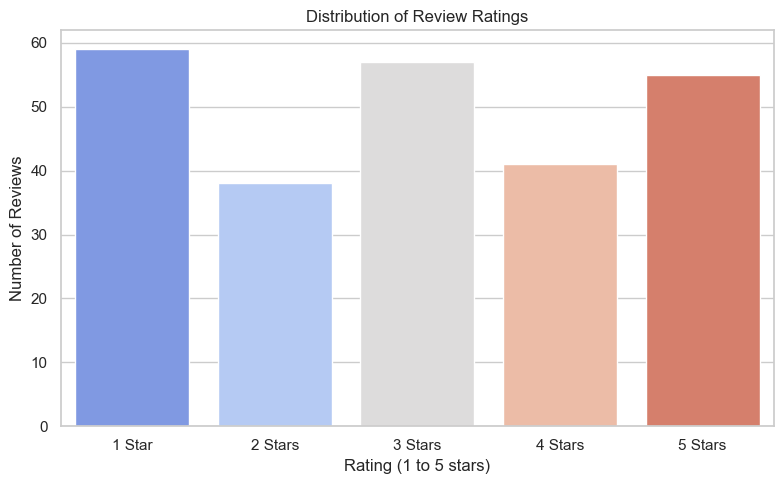

In [87]:
# 1. What is the distribution of review ratings? 
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of review ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=Df, x='rating', palette='coolwarm')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1 to 5 stars)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1, 2, 3, 4], ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.tight_layout()
plt.show()

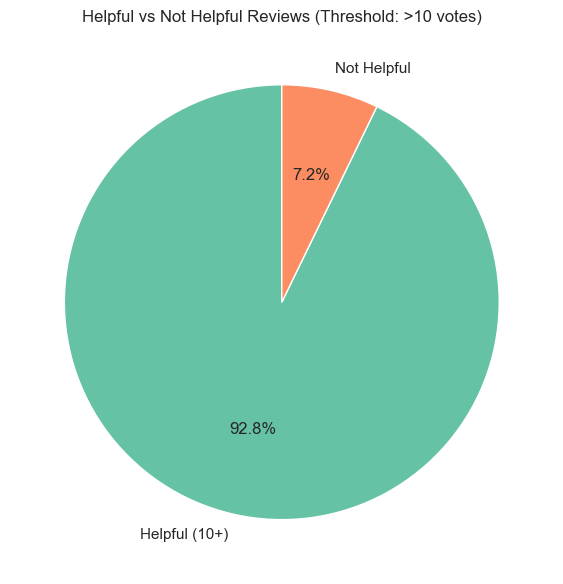

In [88]:
# 2. How many reviews were marked as helpful (above a certain threshold)?

# Define threshold
threshold = 10

# Count helpful vs not helpful
helpful_counts = pd.Series([
    'Helpful (10+)' if x > threshold else 'Not Helpful' 
    for x in Df['helpful_votes']
]).value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62']
helpful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Helpful vs Not Helpful Reviews (Threshold: >10 votes)')
plt.ylabel('')
plt.tight_layout()
plt.show()

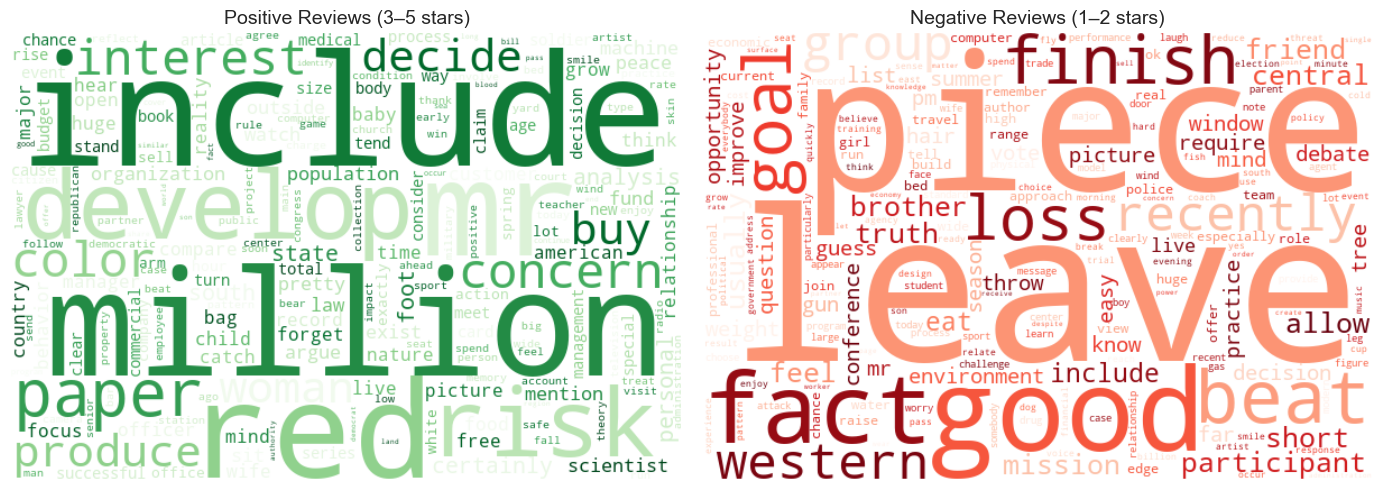

In [89]:
# 3. Most Common Keywords in Positive vs. Negative Reviews

# Filter based on ratings
positive_reviews = Df[Df['rating'] >= 3]['review']
negative_reviews = Df[Df['rating'] <= 2]['review']

# Join all text
positive_text = ' '.join(positive_reviews.dropna().astype(str))
negative_text = ' '.join(negative_reviews.dropna().astype(str))

# Create word clouds
plt.figure(figsize=(14, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews (3–5 stars)", fontsize=14)

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()


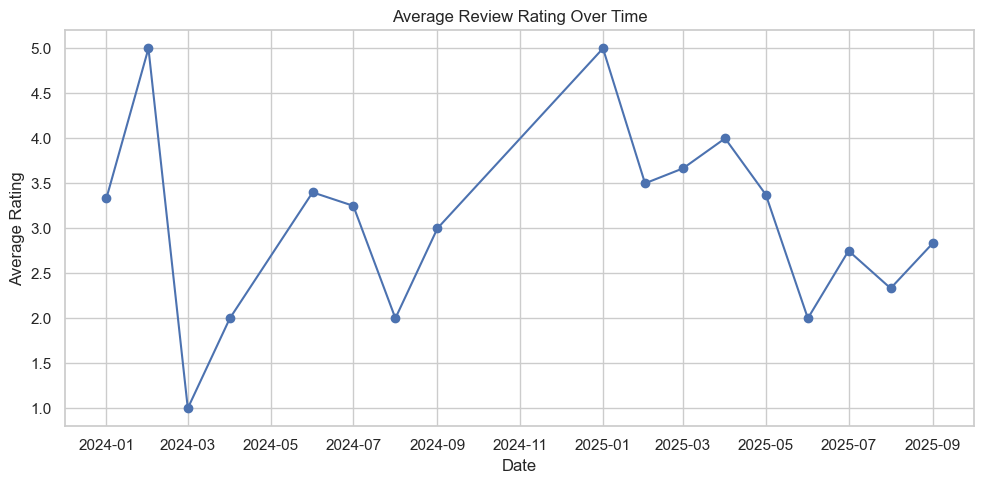

In [91]:
# 4. How has the average rating changed over time?

# Convert date column to datetime format 
Df['date'] = pd.to_datetime(Df['date'], format='mixed', dayfirst=True, errors='coerce')

# Group by time — weekly or monthly
avg_rating_over_time = Df.groupby(Df['date'].dt.to_period('M'))['rating'].mean().reset_index()
avg_rating_over_time['date'] = avg_rating_over_time['date'].dt.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_over_time['date'], avg_rating_over_time['rating'], marker='o', linestyle='-')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16432\392742019.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")


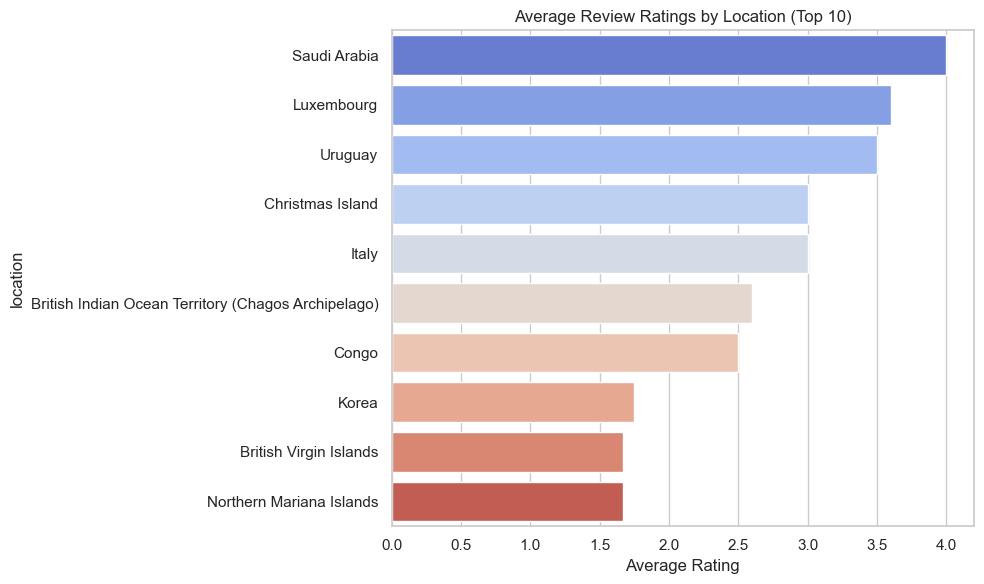

In [92]:
# 5. How Do Ratings Vary by User Location?

# Top 10 countries by review count
top_countries = Df['location'].value_counts().nlargest(10).index
filtered_df = Df[Df['location'].isin(top_countries)]

# Average rating by location
avg_rating_by_location = filtered_df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette="coolwarm")
plt.xlabel('Average Rating')
plt.title('Average Review Ratings by Location (Top 10)')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16432\2418220076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')


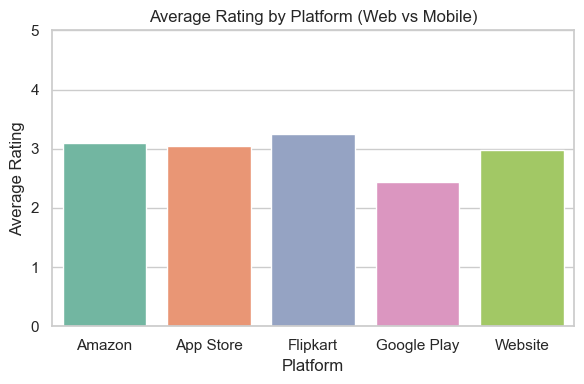

In [93]:
# 6. Which Platform Gets Better Reviews? (Web vs. Mobile)

# Group by platform and calculate average ratings
avg_rating_by_platform = Df.groupby('platform')['rating'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette='Set2')
plt.title('Average Rating by Platform (Web vs Mobile)')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


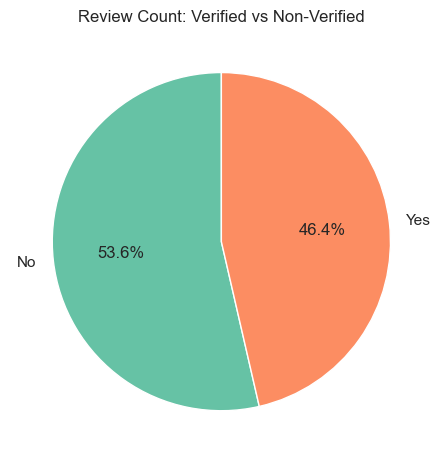

In [94]:
# 7. Are Verified Users More Satisfied Than Non-Verified Ones?

# Distribution of Verified vs Non-Verified Reviews
verified_counts = Df['verified_purchase'].value_counts()

# Plotting side-by-side pie charts
plt.figure(figsize=(12, 6))
colors = ['#66c2a5', '#fc8d62']

# Subplot 1: Review count
plt.subplot(1, 2, 1)
verified_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=verified_counts.index,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Review Count: Verified vs Non-Verified')
plt.ylabel('');

C:\Users\user\AppData\Local\Temp\ipykernel_16432\3706684779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=Df, palette='Blues')


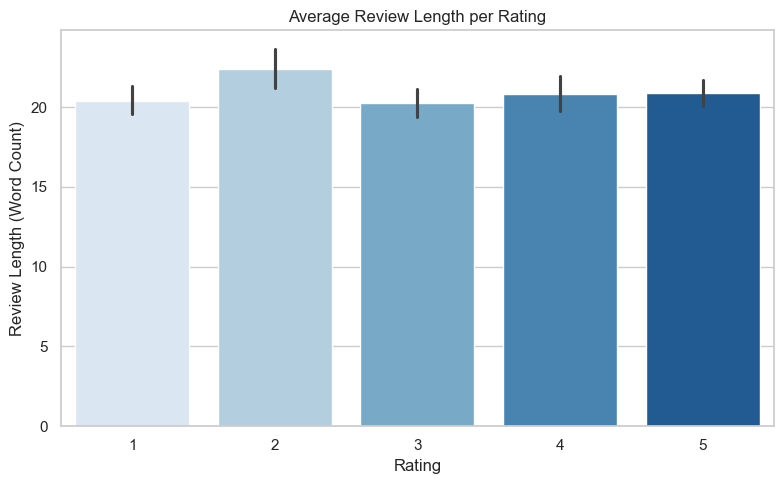

In [95]:
# 8. Average Length of Reviews per Rating Category

# Bar Chart: Average Review Length by Rating
plt.figure(figsize=(8, 5))
sns.barplot(x='rating', y='review_length', data=Df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.tight_layout()
plt.show()

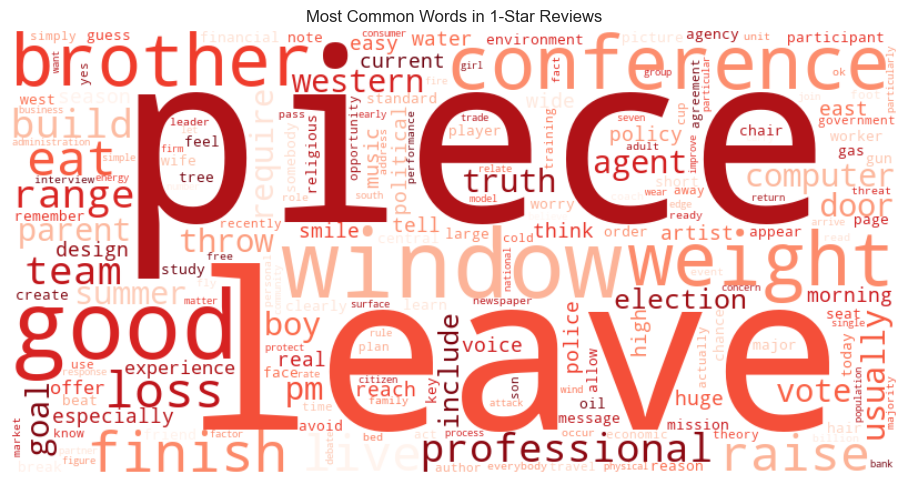

In [96]:
# 9. Most Mentioned Words in 1-Star Reviews

# Filter 1-star reviews
one_star_text = ' '.join(df[Df['rating'] == 1]['review'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in 1-Star Reviews')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16432\2011473485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')


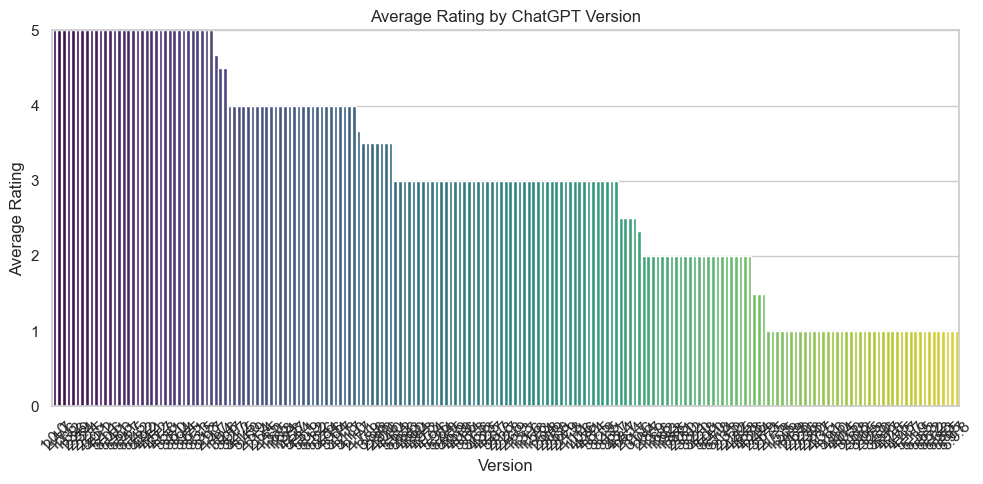

In [97]:
# 10. Which ChatGPT Version Received the Highest Average Rating?

# Group by version and calculate average rating
version_avg = Df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()

# Bar plot: Versions vs average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x='version', y='rating', data=version_avg, palette='viridis')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [98]:
# Sentiment Labeling

def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

Df['sentiment'] = Df['rating'].apply(label_sentiment)
print(Df[['rating', 'sentiment']].head(10))

# Ratings 1 or 2 → 'negative'
# Rating 3 → 'neutral'
# Ratings 4 or 5 (or anything above 3) → 'positive'

   rating sentiment
0       4  positive
1       4  positive
2       5  positive
3       1  negative
4       5  positive
5       3   neutral
6       3   neutral
7       2  negative
8       1  negative
9       3   neutral


In [99]:
df.to_csv(r'C:\Users\user\Desktop\CapstoneProject\NLP\clean.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_16432\472746610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


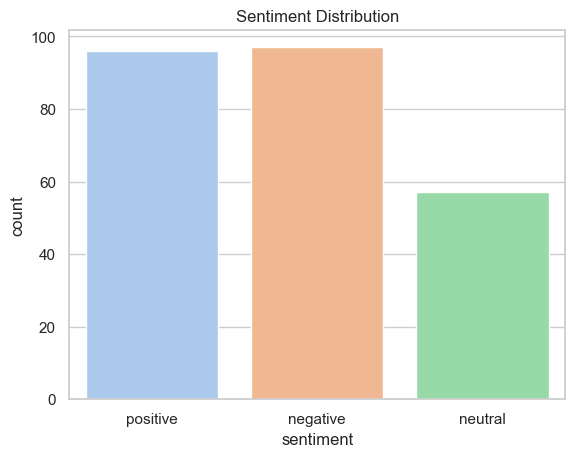

In [100]:
# Count of Each Sentiment
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16432\3430321464.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')


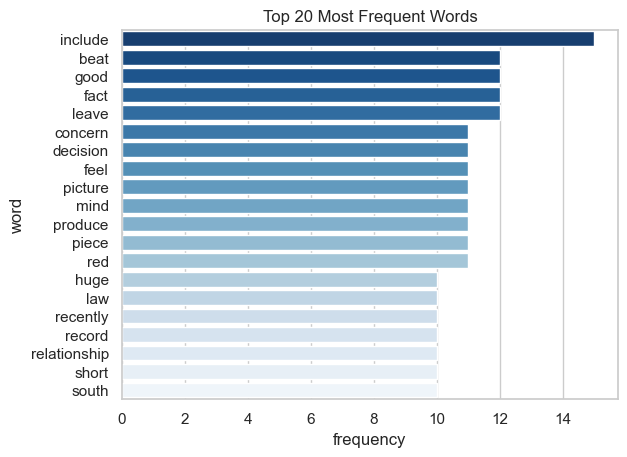

In [101]:
# Most Frequent Words (Histogram)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'])

# Convert to DataFrame
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Plot
sns.barplot(data=word_freq.sort_values(by='frequency', ascending=False), x='frequency', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [104]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

df = pd.read_csv(r"C:\Users\user\Desktop\CapstoneProject\NLP\clean.csv")
df = df.copy()

# strip spaces in column names (important)
df.columns = df.columns.str.strip()


In [106]:
df['sentiment'] = df['sentiment'].map({
    'negative': 0,
    'neutral': 1,
    'positive': 2
})

# sanity check
print("Sentiment classes:", df['sentiment'].unique())

Sentiment classes: [2 0 1]


In [107]:
X_text = df['review']
y = df['sentiment']

In [108]:
#TF-IDF Vectorization

tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

X_tfidf = tfidf.fit_transform(X_text)

In [109]:
#SMOTE ---CLASS BALANCING

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf.toarray(), y)

print("After SMOTE:", pd.Series(y_resampled).value_counts())

After SMOTE: sentiment
2    97
0    97
1    97
Name: count, dtype: int64


In [110]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)

In [111]:
#Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        eval_metric='mlogloss',
        random_state=42
    )
}


🔹 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        29
           1       0.49      0.66      0.56        29
           2       0.40      0.27      0.32        30

    accuracy                           0.44        88
   macro avg       0.43      0.45      0.43        88
weighted avg       0.43      0.44      0.43        88



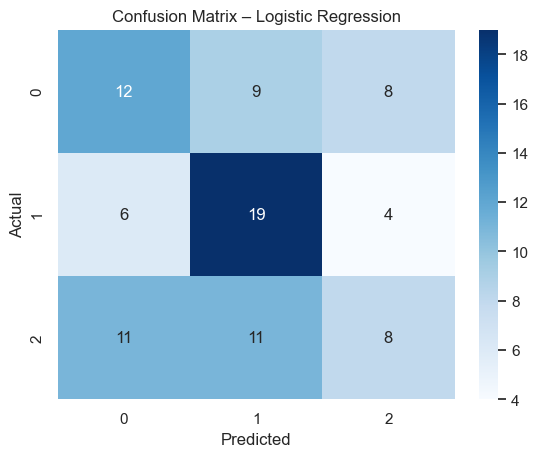


🔹 Model: Random Forest
              precision    recall  f1-score   support

           0       0.44      0.66      0.53        29
           1       0.80      0.55      0.65        29
           2       0.48      0.40      0.44        30

    accuracy                           0.53        88
   macro avg       0.57      0.54      0.54        88
weighted avg       0.57      0.53      0.54        88



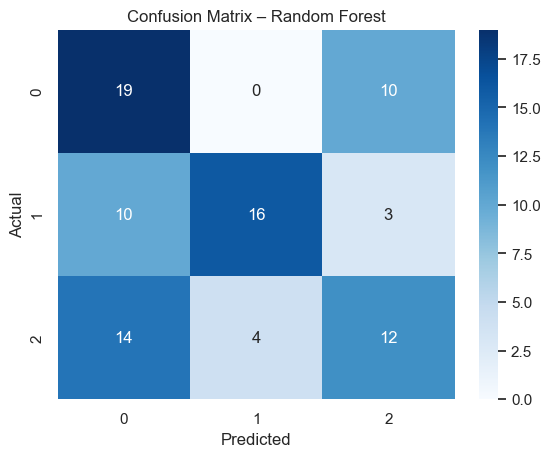


🔹 Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.36      0.31      0.33        29
           1       0.42      0.69      0.52        29
           2       0.47      0.23      0.31        30

    accuracy                           0.41        88
   macro avg       0.41      0.41      0.39        88
weighted avg       0.42      0.41      0.39        88



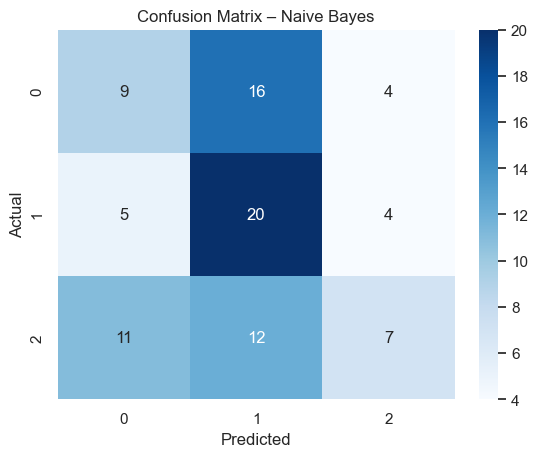


🔹 Model: XGBoost
              precision    recall  f1-score   support

           0       0.43      0.66      0.52        29
           1       0.60      0.41      0.49        29
           2       0.42      0.33      0.37        30

    accuracy                           0.47        88
   macro avg       0.48      0.47      0.46        88
weighted avg       0.48      0.47      0.46        88



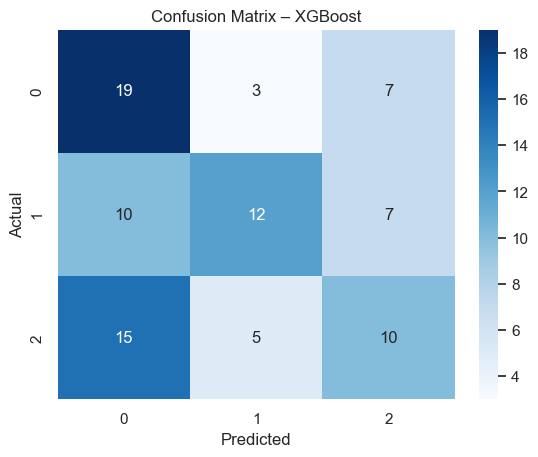

In [112]:
#Model training and evaluation
results = []

for name, model in models.items():
    print(f"\n🔹 Model: {name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:
        auc = np.nan

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score (macro)": f1,
        "AUC-ROC (OvR)": auc
    })

In [113]:
#Model Comparison

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score (macro)", ascending=False).reset_index(drop=True)

results_df

,Model,Accuracy,F1-score (macro),AUC-ROC (OvR)
0,Random Forest,0.534091,0.539068,0.684739
1,XGBoost,0.465909,0.460238,0.623329
2,Logistic Regression,0.443182,0.430872,0.641123
3,Naive Bayes,0.409091,0.387975,0.627528


In [114]:

from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # two hidden layers
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          early_stopping=True,
                          n_iter_no_change=10,
                          validation_fraction=0.1,
                          random_state=42)

print("\n🔹 Model: MLPClassifier")


🔹 Model: MLPClassifier


In [115]:
mlp_model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64), max_iter=300,
              random_state=42)

In [116]:
# Predict on test set
y_pred_mlp = mlp_model.predict(X_test)

In [117]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.55      0.48        29
           1       0.57      0.59      0.58        29
           2       0.45      0.30      0.36        30

    accuracy                           0.48        88
   macro avg       0.48      0.48      0.47        88
weighted avg       0.48      0.48      0.47        88

Accuracy: 0.4772727272727273


AUC-ROC Score (OvR): 0.6579453211247484


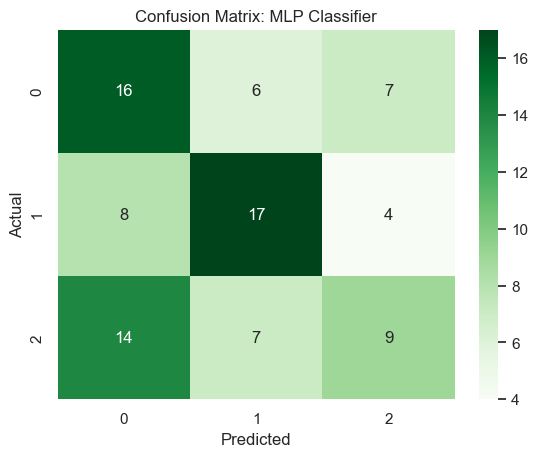

In [118]:
# AUC-ROC Score
if hasattr(mlp_model, "predict_proba"):
    y_proba_mlp = mlp_model.predict_proba(X_test)
    auc_mlp = roc_auc_score(y_test, y_proba_mlp, multi_class='ovr')
    print("AUC-ROC Score (OvR):", auc_mlp)
else:
    print("AUC-ROC not available (model does not support probability prediction)")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [119]:
# Cross-validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores_mlp = cross_val_score(mlp_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores_mlp)
print("Mean CV Accuracy:", cv_scores_mlp.mean())

Cross-validation Accuracy Scores: [0.47457627 0.46551724 0.5        0.53448276 0.36206897]
Mean CV Accuracy: 0.46732904734073644


In [120]:
import pickle

# choose best model (example: Logistic Regression)
best_model = models["Logistic Regression"]

# save model
pickle.dump(best_model, open("sentiment_model.pkl", "wb"))

# save tfidf vectorizer
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

print("Model and TF-IDF saved successfully")

Model and TF-IDF saved successfully
